# A Texas storm case as seen by GPM DPR 

2023-06-21 23:56

In [2]:
import drpy
import numpy as np 
import xarray as xr 
import datetime
import matplotlib.pyplot as plt
import pansat 

## Using DRPy

### Download data 

In [4]:
start_time = datetime.datetime(2023,6,21,23,0)
io = drpy.io.netrunner(servername='Research',username='kukulies@ucar.edu',start_time=start_time)

% Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
Done 755M  100  755M    0     0  23.5M      0  0:00:32  0:00:32 --:--:-- 23.9M 


### Reading and plotting the data with DRPy

In [23]:
print(io.filename[0])

/gpmdata/2023/06/21/radar/2A.GPM.DPR.V9-20211125.20230621-S225600-E002832.052914.V07A.HDF5


In [51]:
june23 = dpr.ds.where((dpr.ds.time.dt.day == 21) &  (dpr.ds.time.dt.hour == 23), drop = True )

#### Data as xarray dataset

In [18]:
dpr = drpy.core.GPMDPR(filename=io.filename[0][-64:])
dpr.ds

<xarray.Dataset>
Dimensions:                    (nscan: 7932, nrayNS: 49, nfreq: 2, nbin: 176,
                                nNUBF: 3, nNP: 4, method: 2, foreBack: 6,
                                nearFar: 3, nsdew: 2, nfreqHI: 3, nbinSZP: 7)
Coordinates:
    Latitude                   (nscan, nrayNS) float32 ...
    Longitude                  (nscan, nrayNS) float32 ...
    height                     (nscan, nrayNS, nbin) float32 ...
    time                       (nscan, nrayNS) datetime64[ns] 2023-06-21T22:5...
Dimensions without coordinates: nscan, nrayNS, nfreq, nbin, nNUBF, nNP, method,
                                foreBack, nearFar, nsdew, nfreqHI, nbinSZP
Data variables: (12/96)
    sunLocalTime               (nscan, nrayNS) float32 ...
    elevation                  (nscan, nrayNS) float32 ...
    landSurfaceType            (nscan, nrayNS) int32 ...
    localZenithAngle           (nscan, nrayNS, nfreq) float32 ...
    flagPrecip                 (nscan, nrayNS) int32 ...
    flagSigmaZeroSaturation    (nscan, nrayNS, nfreq) uint8 ...
    ...                         ...
    surfaceSnowfallIndex       (nscan, nrayNS) float32 ...
    flagEcho                   (nscan, nrayNS, nbin) int8 ...
    qualityData                (nscan, nrayNS) int32 ...
    qualityFlag                (nscan, nrayNS, nfreq) int8 ...
    flagSensor                 (nscan, nfreq) int8 ...
    flagScanPattern            (nscan, nfreq) int16 ...
Attributes:
    FS_SwathHeader:  NumberScansInSet=1;\nMaximumNumberScansTotal=10000;\nNum...

In [69]:
center_lat = 30.8
center_lon = -96
lon = dpr.ds.Longitude.data.mean()
lat = dpr.ds.Latitude.data.mean()
c  = drpy.graph.case_study(filename=io.filename[0][-64:], center_lon = center_lon, center_lat = center_lat)

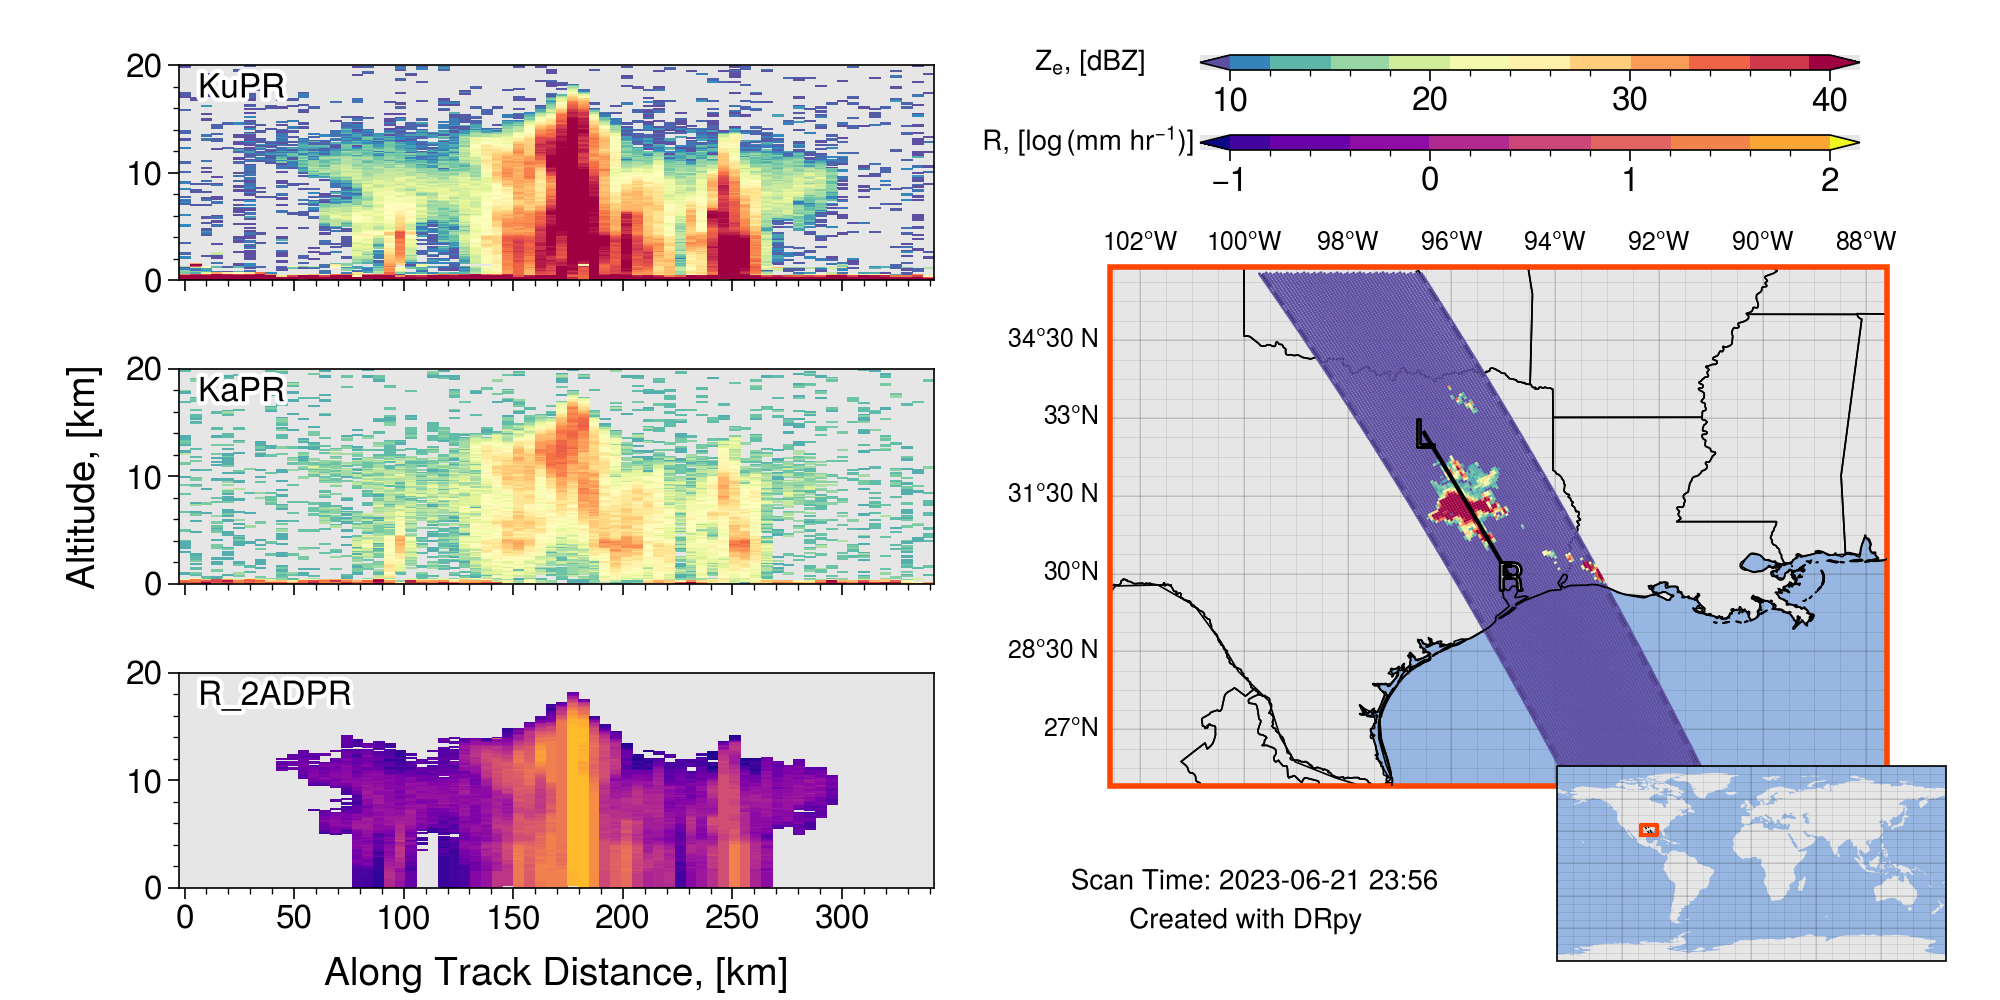

In [71]:
c.plotter_along(start_index=90,end_index=160, scan = 18, params_new={'y_max':20, 'xsections':[0,2,8]})